<a href="https://colab.research.google.com/github/WilkisterMbaka/House-Sales-Analysis-and-Prediction-Hass-Consulting-Company/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2022_06_Wilkister_Mbaka_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Prices Analysis and Prediction**

## **1.0 Defining The Question**

**a) Specifying the Question**

1. Study the factors that affect housing prices
2. Build a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

**b) Defining the Metric for Success**

* Exploratory Data Analysis
* Building regression models
    * Multiple Linear Regression
    * Quantile Regression
    * Ridge Regression
    * Lasso Regression
    * Elastic Net Regression
* Model evaluation through cross validation, RMSE Scores, residual plots and Heteroscedascity

**c) Understanding the context**

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

**d) Recording the Experimental Design**

1. Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
5. Performing regression analysis.
6. Incorporate categorical independent variables into your models.
7. Check for multicollinearity
8. Provide a recommendation based on your analysis. 
9. Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
10. Challenge your solution by providing insights on how you can make improvements in model improvement.

**Coumn Name Meaning**

Id 

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

## **2.0 Reading Data**

In [1]:
#importing Libraries

#importing pandas
import pandas as pd

# Importing Numpy
#
import numpy as np

# Importing Seaborn
#
import seaborn as sns

# Importing Matplotlib
#
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Data from the source i.e. csv
#
df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

## **3.0 Checking the Data**

In [3]:
# Check top 5 records
df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [4]:
# Check bottom 5 records
df.tail()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357

In [5]:
# Determining the no. of records in our dataset
#
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

Number of rows: 21613 
Number of columns: 20


In [6]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
#Checking how many unique value are in a column
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Check for unique values in each column
column_list = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_basement' ]
for col in column_list:
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('**********')
  print('\n')

bedrooms column unique values: 

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
**********


bathrooms column unique values: 

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
**********


floors column unique values: 

[1.  2.  1.5 3.  2.5 3.5]
**********


waterfront column unique values: 

[0 1]
**********


view column unique values: 

[0 3 4 2 1]
**********


condition column unique values: 

[3 5 4 1 2]
**********


grade column unique values: 

[ 7  6  8 11  9  5 10 12  4  3 13  1]
**********


yr_built column unique values: 

[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 

**Observations**
1. Bedrooms has a value of 33 which is too large


## **4.0 Tidying the Dataset**

In [10]:
# dropping the unnecessary columns 
df=df.drop(['id'],axis=1)
df.head(3)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062

In [11]:
# Check for missing values in the dataset
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in the dataset

In [12]:
# Check for duplicates
duplicate = df[df.duplicated()]

duplicate

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
3951   550000.0         4       1.75         2410      8447     2.0   
4352   259950.0         2       2.00         1070       649     2.0   
14983  585000.0         3       2.50         2290      5089     2.0   
20054  555000.0         3       2.50         1940      3211     2.0   
20524  529500.0         3       2.25         1410       905     3.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
3951            0     3          4      8        2060            350   
4352            0     0          3      9         720            350   
14983           0     0          3      9        2290              0   
20054           0     0          3      8        1940              0   
20524           0     0          3      9        1410              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
3951       1936          1980    98074  47.6499 -122.088           2520   
4352       2008             0    98106  47.5213 -122.357           1070   
14983      2001             0    98006  47.5443 -122.172           2290   
20054      2009             0    98027  47.5644 -122.093           1880   
20524      2014             0    98116  47.5818 -122.402           1510   

       sqft_lot15  
3951        14789  
4352          928  
14983        7984  
20054        3078  
20524        1352

There are 5 duplicates in this dataset

In [13]:
# Drop duplicates in ranking dataset
df.drop_duplicates(inplace=True)

In [14]:
# Check for duplicates
df.duplicated().sum()

0

In [15]:
# Check the house with 33 bedrooms
df[df['bedrooms'] == 33]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15870  640000.0        33       1.75         1620      6000     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
15870           0     0          5      7        1040            580   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15870      1947             0    98103  47.6878 -122.331           1330   

       sqft_lot15  
15870        4700

It is unlikely that this house has 33 bedrooms given the Square feet area of living area. So we will drop this record

In [16]:
# Drop row
df.drop(df[df['bedrooms'] == 33].index, inplace = True)
df[df['bedrooms'] == 33]

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

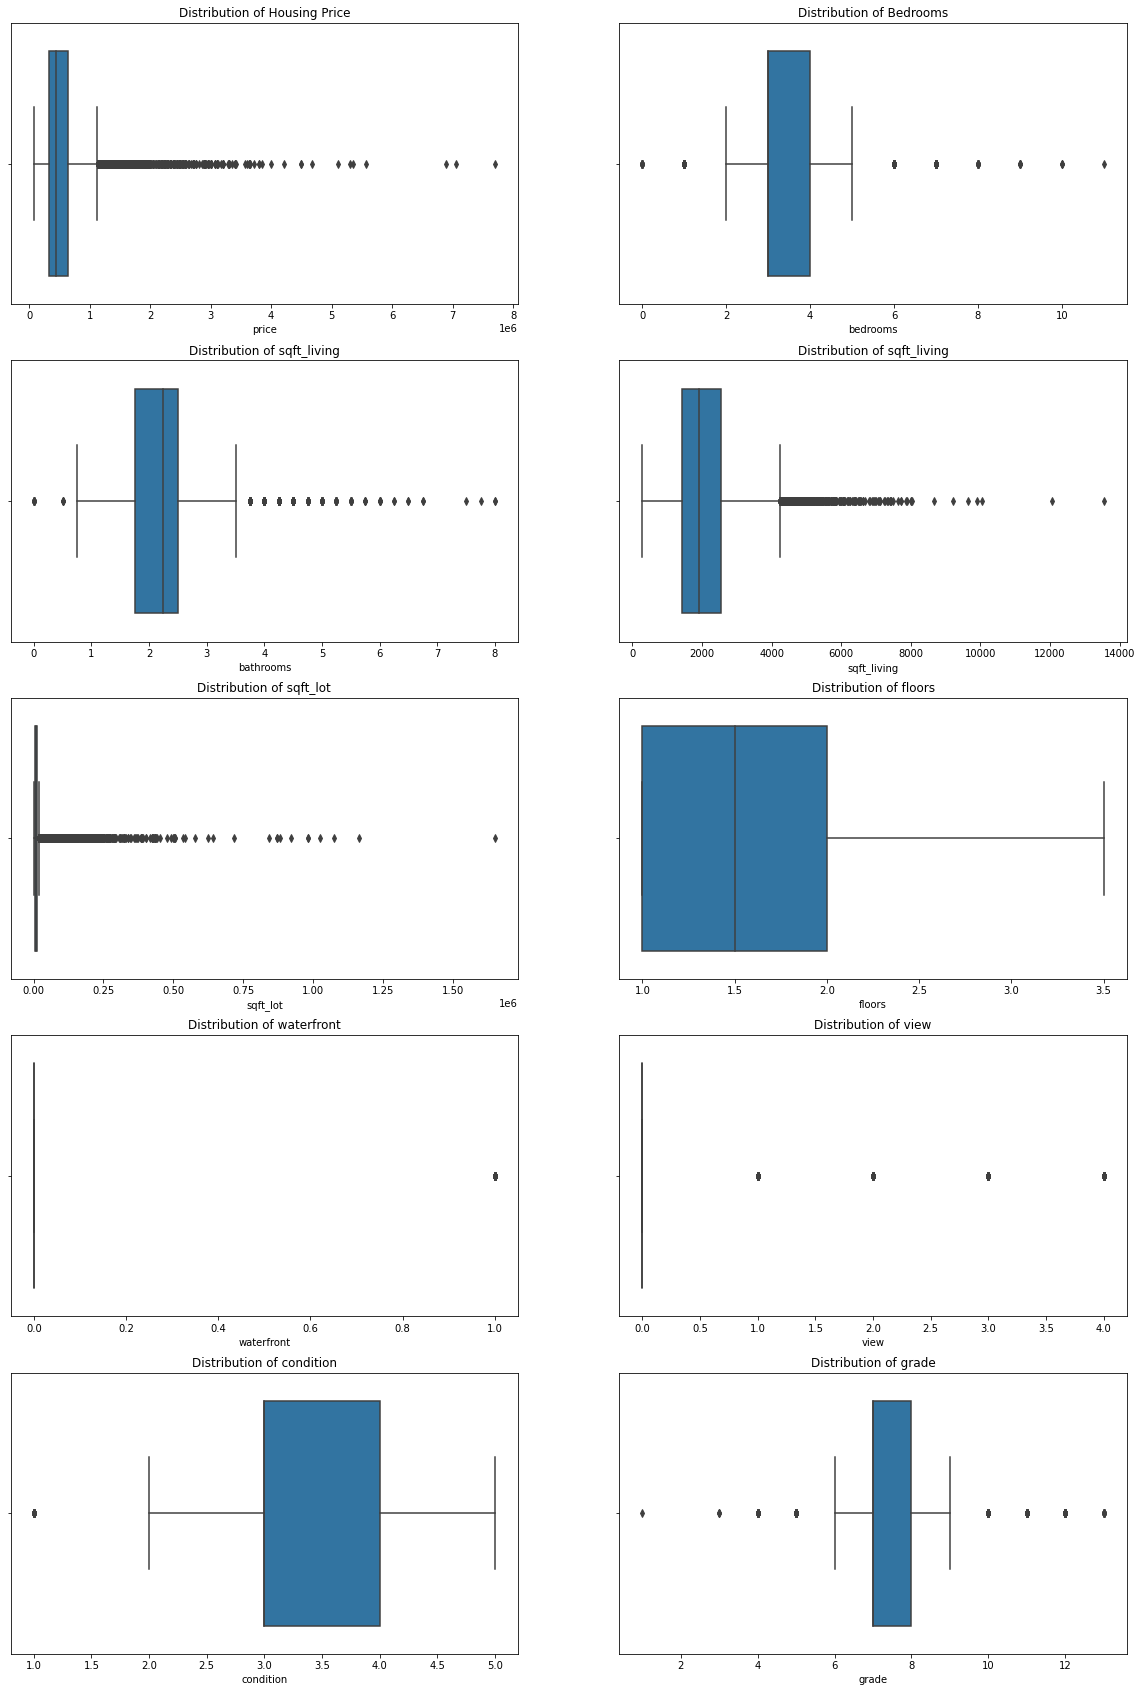

In [17]:
# Check for outliers
fig, ax= plt.subplots(5,2,figsize=[20, 30])

sns.boxplot(data=df, x='price', ax=ax[0,0]).set_title('Distribution of Housing Price')
sns.boxplot(data=df, x='bedrooms', ax=ax[0,1]).set_title('Distribution of Bedrooms')
sns.boxplot(data=df, x='bathrooms', ax=ax[1,0]).set_title('Distribution of sqft_living')
sns.boxplot(data=df, x='sqft_living', ax=ax[1,1]).set_title('Distribution of sqft_living')
sns.boxplot(data=df, x='sqft_lot', ax=ax[2,0]).set_title('Distribution of sqft_lot')
sns.boxplot(data=df, x='floors', ax=ax[2,1]).set_title('Distribution of floors')
sns.boxplot(data=df, x='waterfront', ax=ax[3,0]).set_title('Distribution of waterfront')
sns.boxplot(data=df, x='view', ax=ax[3,1]).set_title('Distribution of view')
sns.boxplot(data=df, x='condition', ax=ax[4,0]).set_title('Distribution of condition')
sns.boxplot(data=df, x='grade', ax=ax[4,1]).set_title('Distribution of grade')
plt.show()



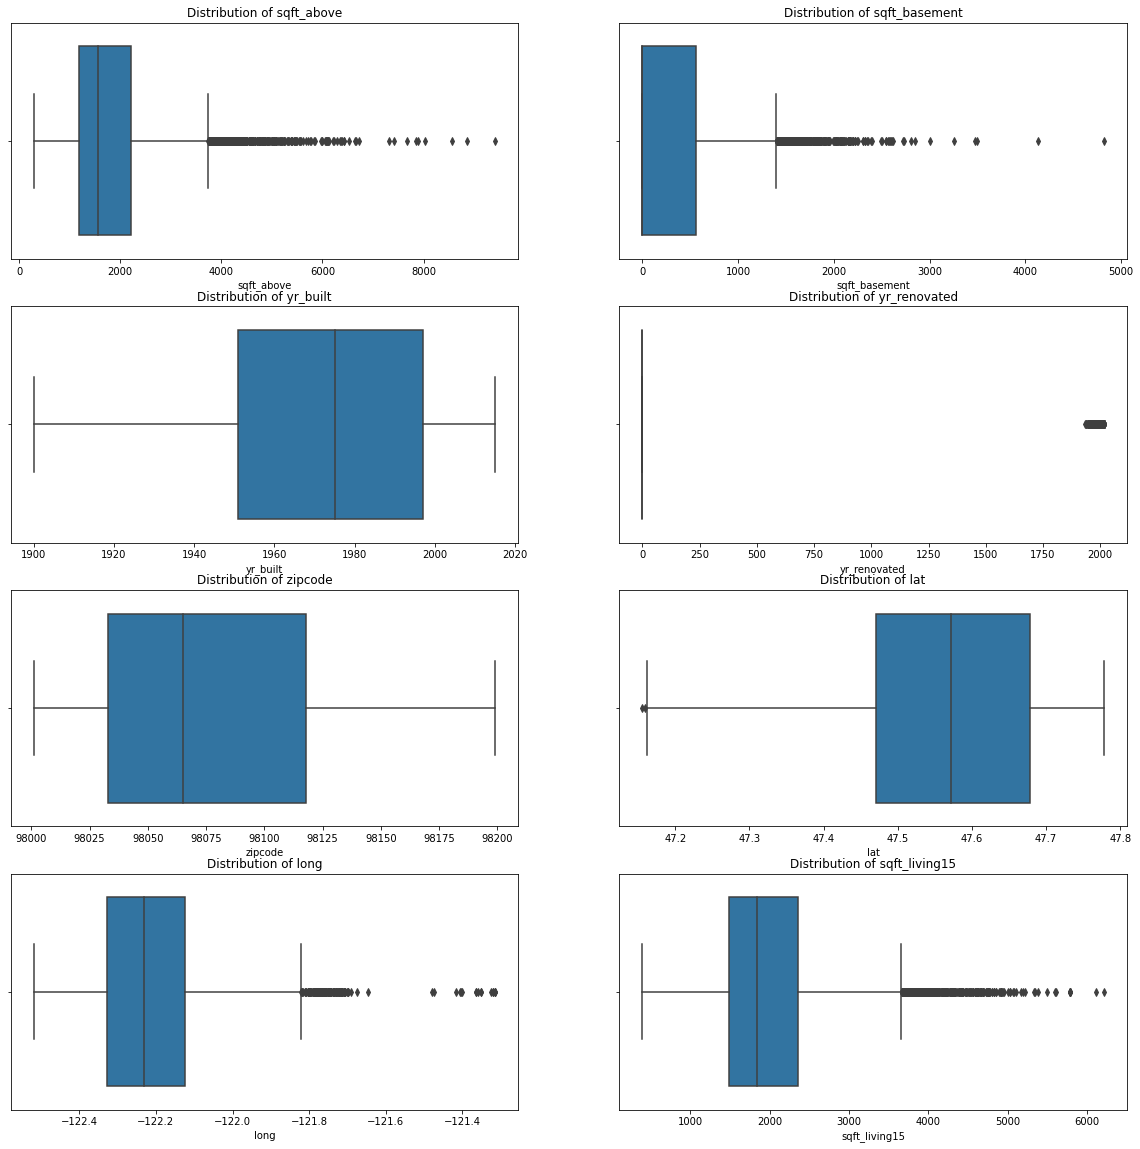

In [18]:
# Check for outliers
fig, ax= plt.subplots(4,2,figsize=[20, 20])

sns.boxplot(data=df, x='sqft_above', ax=ax[0,0]).set_title('Distribution of sqft_above')
sns.boxplot(data=df, x='sqft_basement', ax=ax[0,1]).set_title('Distribution of sqft_basement')
sns.boxplot(data=df, x='yr_built', ax=ax[1,0]).set_title('Distribution of yr_built')
sns.boxplot(data=df, x='yr_renovated', ax=ax[1,1]).set_title('Distribution of yr_renovated')
sns.boxplot(data=df, x='zipcode', ax=ax[2,0]).set_title('Distribution of zipcode')
sns.boxplot(data=df, x='lat', ax=ax[2,1]).set_title('Distribution of lat')
sns.boxplot(data=df, x='long', ax=ax[3,0]).set_title('Distribution of long')
sns.boxplot(data=df, x='sqft_living15', ax=ax[3,1]).set_title('Distribution of sqft_living15')
plt.show()

Text(0.5, 1.0, 'Distribution of sqft_lot15')

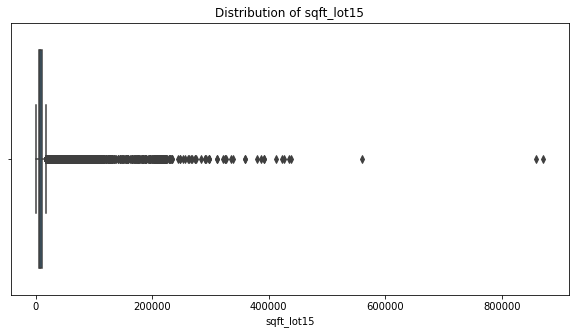

In [19]:
fig= plt.subplots(figsize=[10, 5])
sns.boxplot(data=df, x='sqft_lot15').set_title('Distribution of sqft_lot15')

In [20]:
#There seems to be very many outliers but lets count them to be sure

df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())/df.shape[0] * 100

price             5.364002
bedrooms          2.522331
bathrooms         2.642662
sqft_living       2.647290
sqft_lot         11.213958
floors            0.000000
waterfront        0.754385
view              9.825520
condition         0.138844
grade             8.844356
sqft_above        2.827787
sqft_basement     2.295552
yr_built          0.000000
yr_renovated      4.225482
zipcode           0.000000
lat               0.009256
long              1.184801
sqft_living15     2.517703
sqft_lot15       10.154117
dtype: float64

## **5.0 Exploratory Data Analysis**

### **5.1 Univariate Analysis**

This data only has numerical attributes

In [21]:
# Getting the univariate describe summary

df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.160700e+04  21607.000000  21607.000000  21607.000000  2.160700e+04   
mean   5.401878e+05      3.369556      2.114754   2079.980238  1.511004e+04   
std    3.674075e+05      0.908018      0.770252    918.521730  4.142583e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.217250e+05      3.000000      1.750000   1428.500000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.620000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069200e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21607.000000  21607.000000  21607.000000  21607.000000  21607.000000   
mean       1.494169      0.007544      0.234230      3.409404      7.656685   
std        0.539912      0.086529      0.766185      0.650707      1.175502   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21607.000000   21607.000000  21607.000000  21607.000000  21607.000000   
mean    1788.449484     291.530754   1971.001018     84.334058  98077.941454   
std      828.144667     442.618452     29.371689    401.525908     53.507849   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21607.000000  21607.000000   21607.000000   21607.000000  
mean      47.560044   -122.213889    1986.613551   12770.481835  
std        0.138579      0.140831     685.422780   27307.583622  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.470850   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.500000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [22]:
# Dispersion - std, var, max, range, skew, kurtosis
d1 = pd.DataFrame( df.apply( np.std ) ).T
d2 = pd.DataFrame( df.apply( np.var ) ).T
d3 = pd.DataFrame( df.apply( lambda x: x.max() - x.min() ) ).T
d4 = pd.DataFrame( df.apply( lambda x: x.skew() ) ).T
d5 = pd.DataFrame( df.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d1, d4, d5] ).T.reset_index()
m.columns = ( ['columns', 'variance', 'range', 'std', 'skew', 'kurtosis'])
m

columns      variance         range            std       skew  \
0           price  1.349820e+11  7.625000e+06  367399.006882   4.021319   
1        bedrooms  8.244594e-01  1.100000e+01       0.907997   0.518396   
2       bathrooms  5.932610e-01  8.000000e+00       0.770234   0.511081   
3     sqft_living  8.436431e+05  1.325000e+04     918.500475   1.471395   
4        sqft_lot  1.716020e+09  1.650839e+06   41424.867951  13.058402   
5          floors  2.914919e-01  2.500000e+00       0.539900   0.616270   
6      waterfront  7.486942e-03  1.000000e+00       0.086527  11.383491   
7            view  5.870118e-01  4.000000e+00       0.766167   3.396579   
8       condition  4.234002e-01  4.000000e+00       0.650692   1.032714   
9           grade  1.381742e+00  1.200000e+01       1.175475   0.771510   
10     sqft_above  6.857918e+05  9.120000e+03     828.125503   1.446698   
11  sqft_basement  1.959020e+05  4.820000e+03     442.608209   1.577818   
12       yr_built  8.626562e+02  1.150000e+02      29.371009  -0.469881   
13   yr_renovated  1.612156e+05  2.015000e+03     401.516616   4.551614   
14        zipcode  2.862957e+03  1.980000e+02      53.506611   0.405742   
15            lat  1.920311e-02  6.217000e-01       0.138575  -0.485108   
16           long  1.983250e-02  1.204000e+00       0.140828   0.885210   
17  sqft_living15  4.697826e+05  5.811000e+03     685.406919   1.108210   
18     sqft_lot15  7.456696e+08  8.705490e+05   27306.951699   9.505616   

      kurtosis  
0    34.514107  
1     1.838883  
2     1.279108  
3     5.241880  
4   285.006109  
5    -0.484932  
6   127.595686  
7    10.899971  
8     0.525967  
9     1.191727  
10    3.401842  
11    2.714575  
12   -0.657094  
13   18.720452  
14   -0.853593  
15   -0.676824  
16    1.049841  
17    1.596916  
18  150.726320

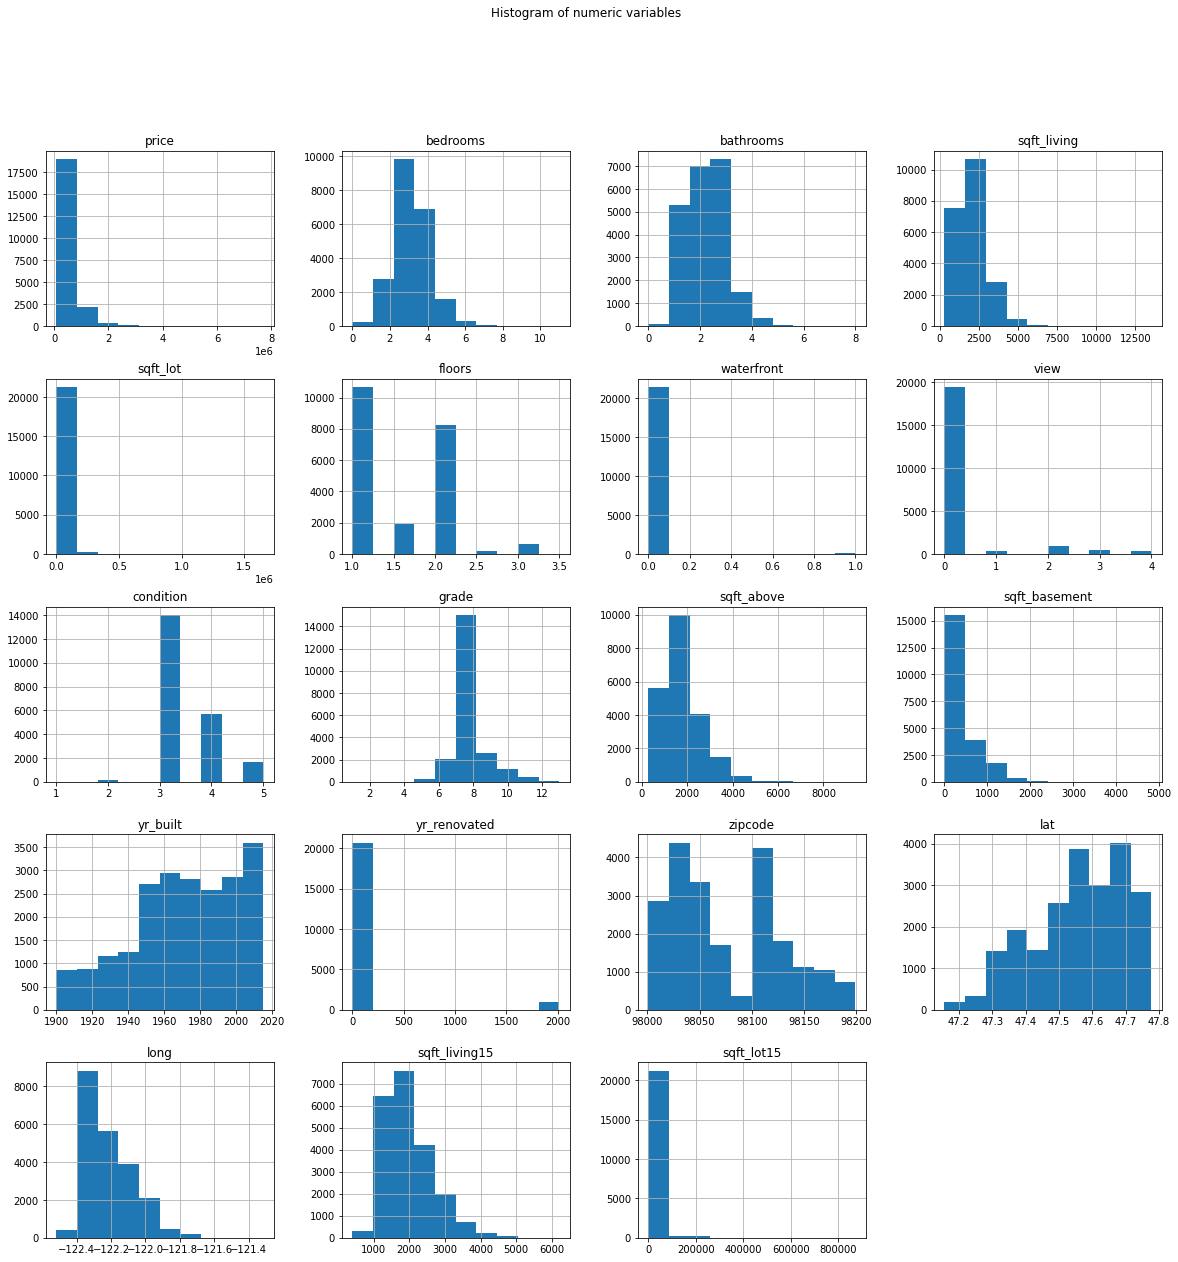

In [23]:
# Plotting the numerical variables on histogram to view their distributions.

df.hist(bins=10, figsize=(20,20))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Fifa Histogram')
plt.show()

[Text(0.5, 1.0, 'Count of houses per number of bedroom')]

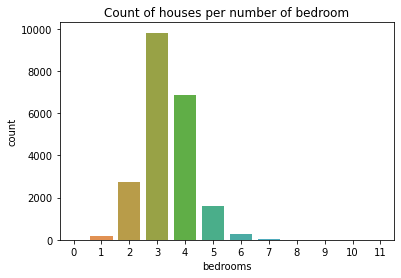

In [24]:
# Number of houses with different bedrooms
sns.countplot(x ='bedrooms', data = df).set(title='Count of houses per number of bedroom')

Houses with 3 bedroom had the highest count

[Text(0.5, 1.0, 'Count of houses per number of bathrooms')]

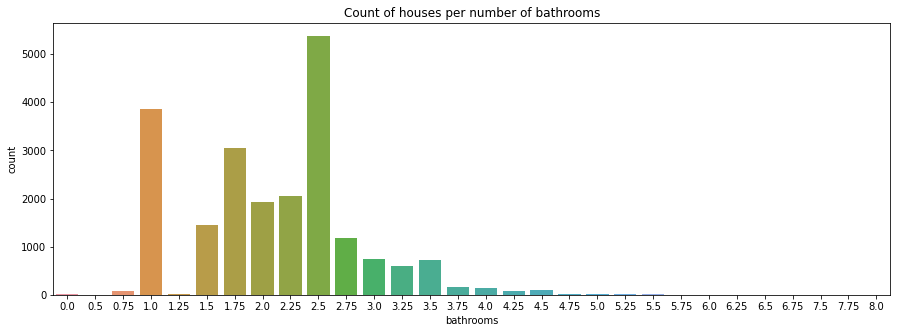

In [25]:
# Number of houses with different bedrooms
fig= plt.subplots(figsize=[15, 5])
sns.countplot(x ='bathrooms', data = df).set(title='Count of houses per number of bathrooms')

Houses with 2.5 bathrooms had the highest count

[Text(0.5, 1.0, 'Count of houses per number of floors')]

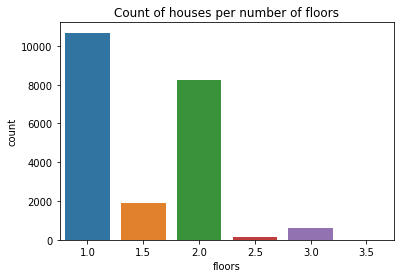

In [26]:
# Number of houses with different bedrooms
# fig= plt.subplots(figsize=[10, 5])
sns.countplot(x ='floors', data = df).set(title='Count of houses per number of floors')

Houses with one floor had the highest count

[Text(0.5, 1.0, 'Count of houses with waterfront view')]

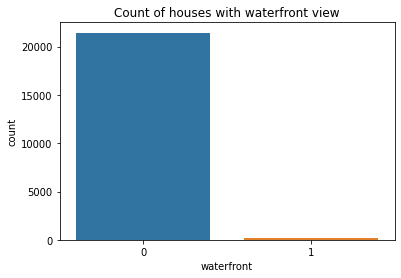

In [27]:
# Number of houses with different bedrooms
# fig= plt.subplots(figsize=[10, 5])
sns.countplot(x ='waterfront', data = df).set(title='Count of houses with waterfront view')

Most houses in our dataset did not have a waterfront

[Text(0.5, 1.0, 'Count of houses per number of views')]

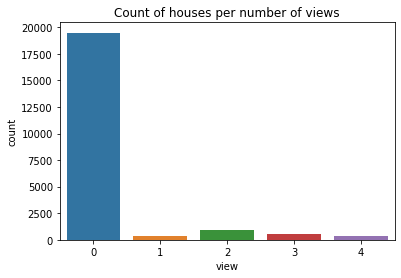

In [28]:
# Number of houses with different bedrooms
# fig= plt.subplots(figsize=[10, 5])
sns.countplot(x ='view', data = df).set(title='Count of houses per number of views')

Most houses in our dataset had only one view

[Text(0.5, 1.0, 'Count of houses per condition')]

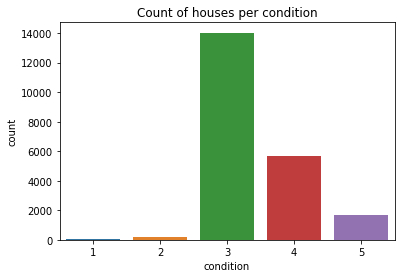

In [29]:
# Number of houses with different bedrooms
# fig= plt.subplots(figsize=[10, 5])
sns.countplot(x ='condition', data = df).set(title='Count of houses per condition')

Most houses in our dataset were in neutral(3) condition

[Text(0.5, 1.0, 'Count of houses per number of views')]

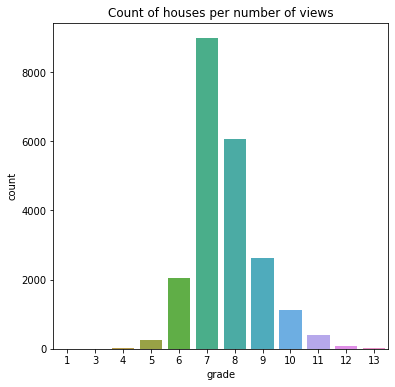

In [30]:
# Number of houses with different bedrooms
fig= plt.subplots(figsize=[6, 6])
sns.countplot(x ='grade', data = df).set(title='Count of houses per number of grade')

A high number of houses had grade 7 in our dataset

[Text(0.5, 1.0, 'Count of houses per zipcode')]

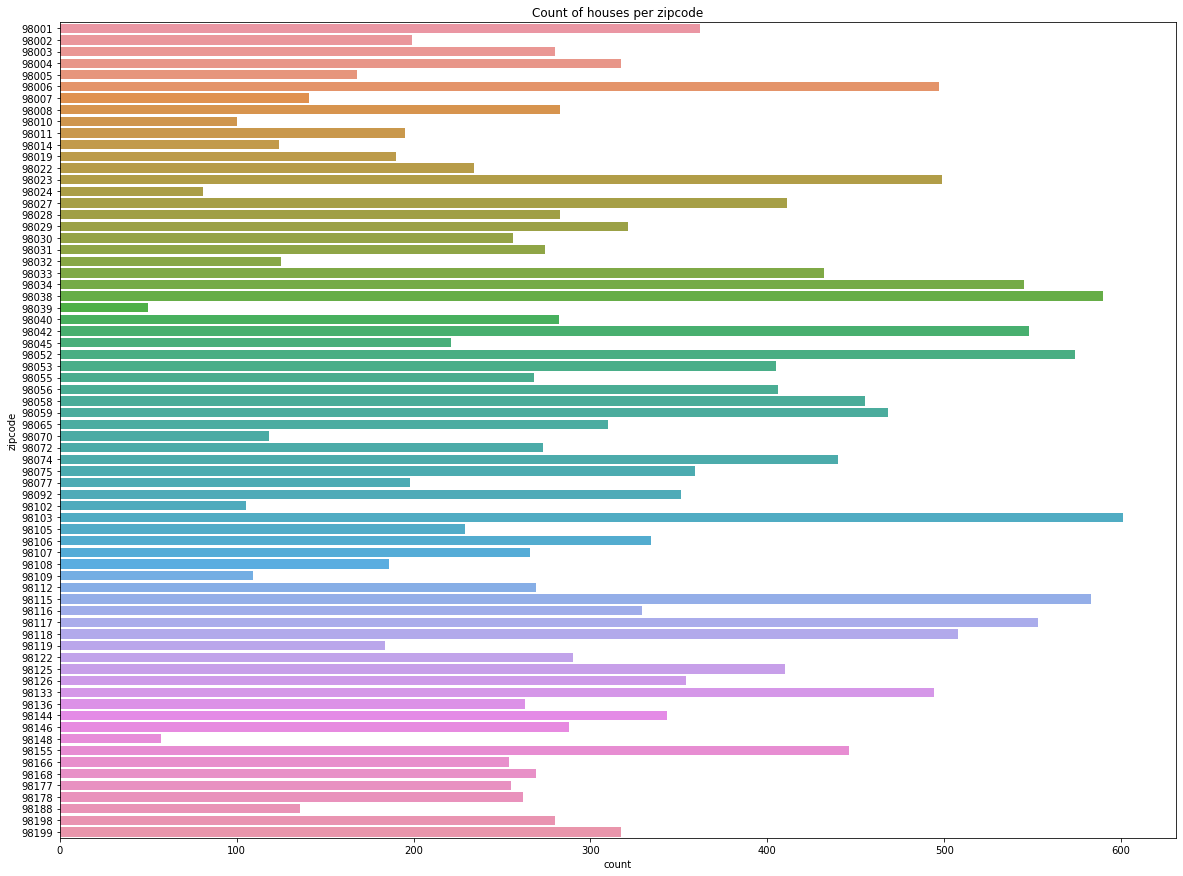

In [130]:
# Number of houses with different bedrooms
fig= plt.subplots(figsize=[20, 15])
sns.countplot(y ='zipcode', data = df).set(title='Count of houses per zipcode')

### **5.2 Bivariate Analysis**

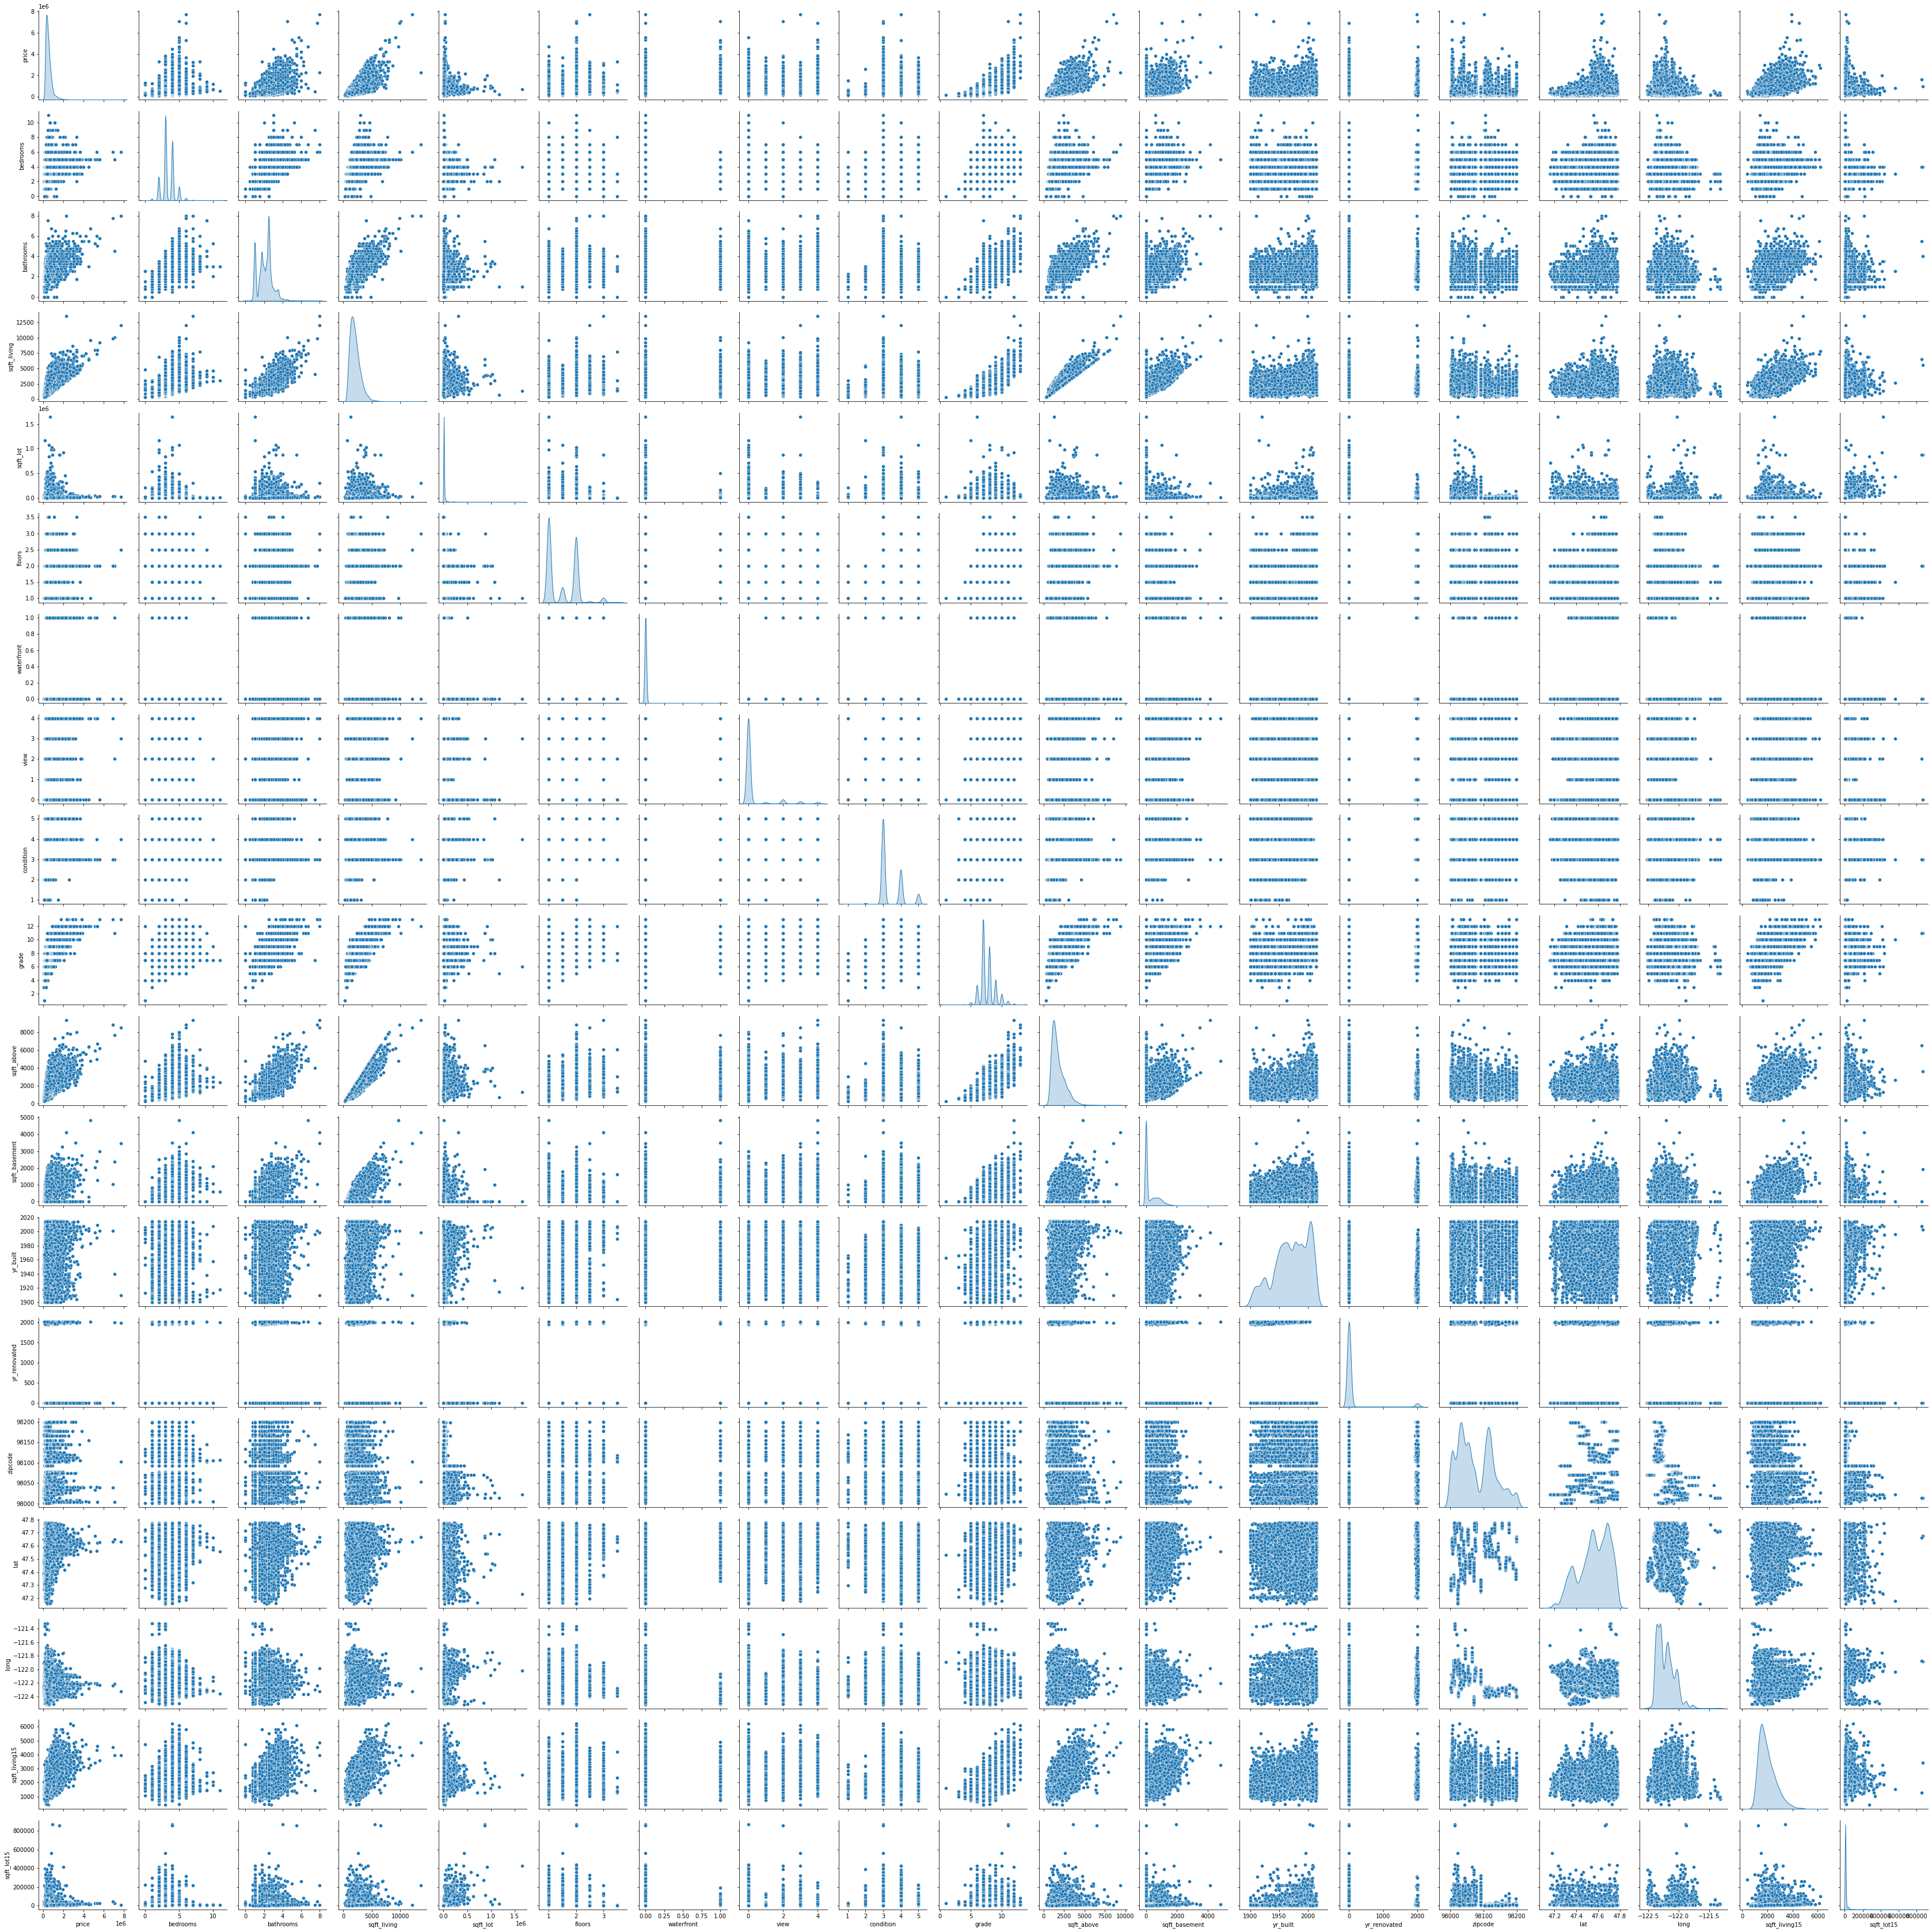

In [33]:
# Pair plot analysis for the whole dataframe
sns.pairplot(df, diag_kind='kde')
plt.show()

High positive correlation

sqft_living, sqft_living15, grade, sqft_above, bathrooms and price.

The columns in this datset have high correlations

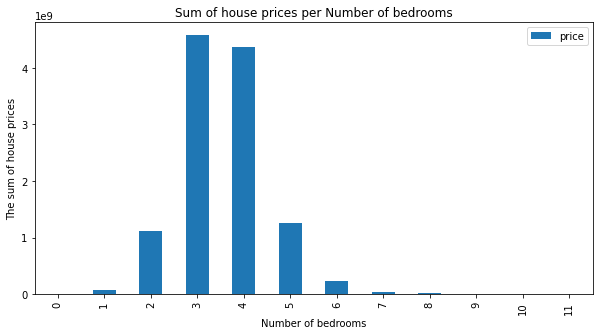

In [34]:
# Creating a bar plot house prices against number of bedrooms

df[['bedrooms','price']].groupby('bedrooms').sum().plot.bar(figsize = (10, 5))
plt.title('Sum of house prices per Number of bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('The sum of house prices')
plt.show()

Houses with 3 bedrooms have generated the highest sales

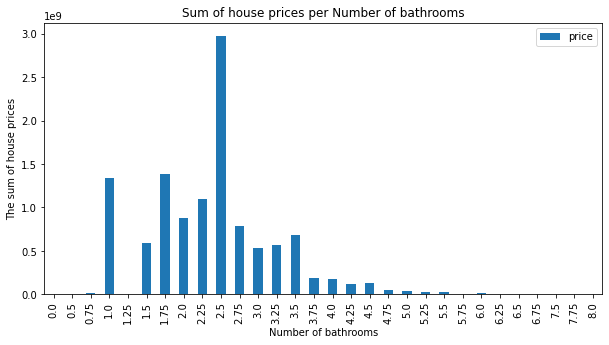

In [35]:
# Creating a bar plot house prices against number of bathrooms

df[['bathrooms','price']].groupby('bathrooms').sum().plot.bar(figsize = (10, 5))
plt.title('Sum of house prices per Number of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('The sum of house prices')
plt.show()

Houses with 2.5 bedrooms have generated the highest sales

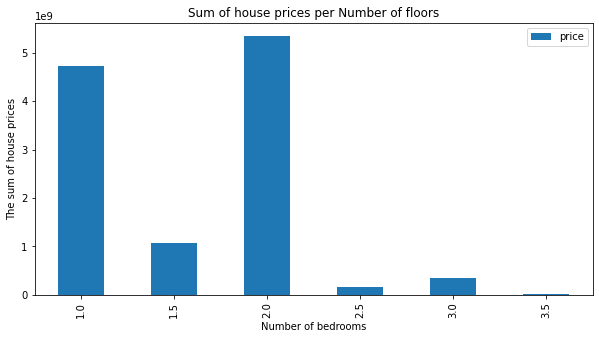

In [36]:
# Creating a bar plot house prices against number of floors

df[['floors','price']].groupby('floors').sum().plot.bar(figsize = (10, 5))
plt.title('Sum of house prices per Number of floors')
plt.xlabel('Number of bedrooms')
plt.ylabel('The sum of house prices')
plt.show()

Houses with 1 floor and 2 floors have the most sales

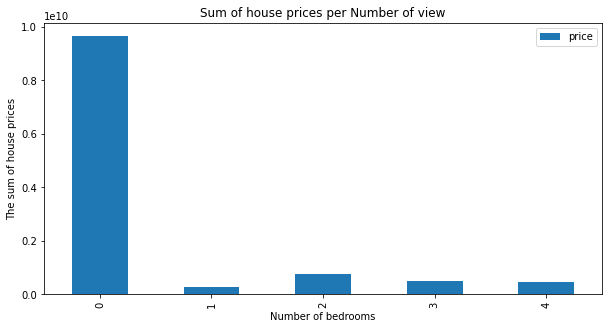

In [37]:
# Creating a bar plot house prices against number of views

df[['view','price']].groupby('view').sum().plot.bar(figsize = (10, 5))
plt.title('Sum of house prices per Number of view')
plt.xlabel('Number of bedrooms')
plt.ylabel('The sum of house prices')
plt.show()

Houses with 0 views have the most sales

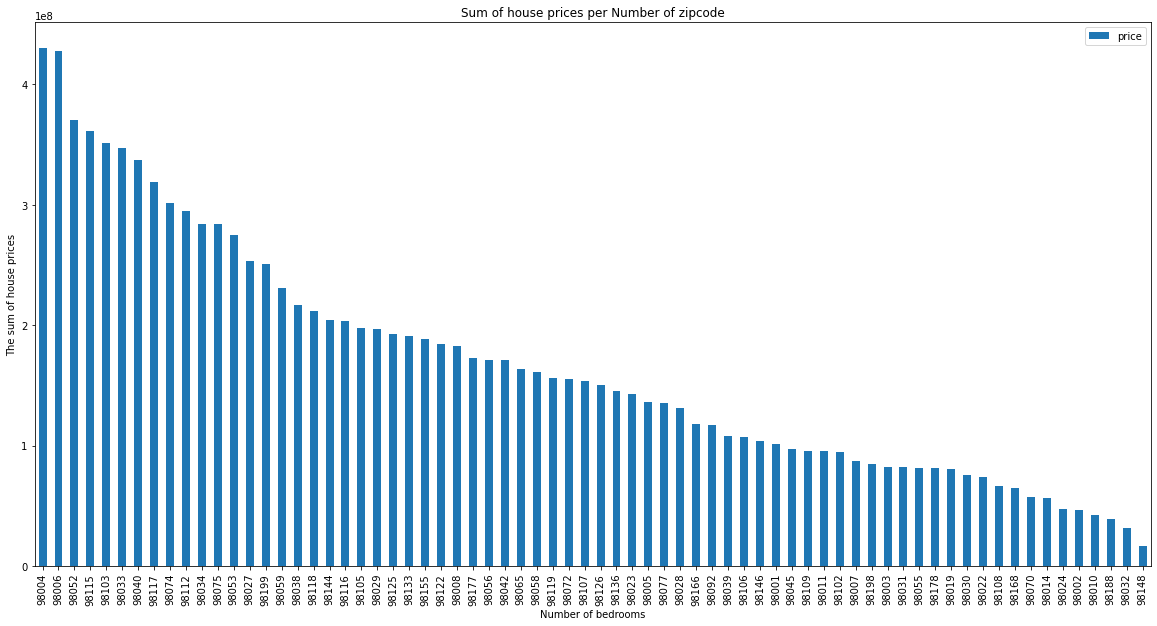

In [38]:
# Creating a bar plot house prices against zipcode

df[['zipcode','price']].groupby('zipcode').sum().sort_values(by='price',ascending= False).plot.bar(figsize = (20, 10))
plt.title('Sum of house prices per Number of zipcode')
plt.xlabel('Number of bedrooms')
plt.ylabel('The sum of house prices')
plt.show()

The zipcode has the highest number of sales

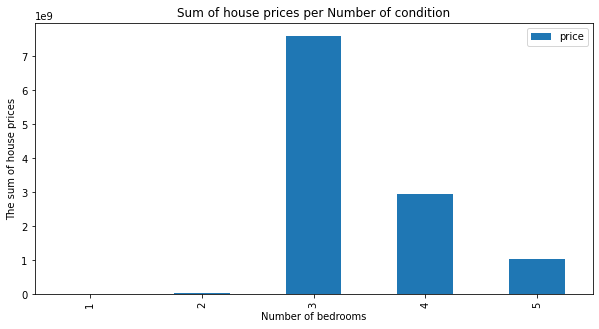

In [39]:
# Creating a bar plot house prices against condition

df[['condition','price']].groupby('condition').sum().plot.bar(figsize = (10, 5))
plt.title('Sum of house prices per Number of condition')
plt.xlabel('Number of bedrooms')
plt.ylabel('The sum of house prices')
plt.show()

Houses with a condition of 3 and above have the most sales

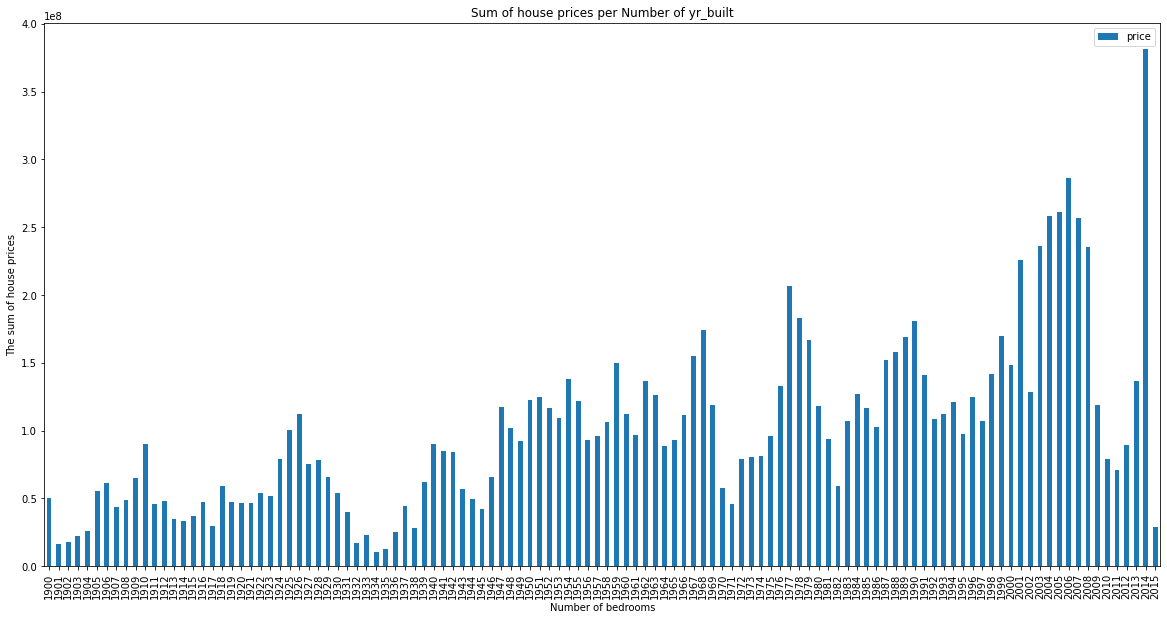

In [40]:
# Creating a bar plot house prices against year built

df[['yr_built','price']].groupby('yr_built').sum().plot.bar(figsize = (20, 10))
plt.title('Sum of house prices per Number of yr_built')
plt.xlabel('Number of bedrooms')
plt.ylabel('The sum of house prices')
plt.show()

The year 2014 has the highest number of sales

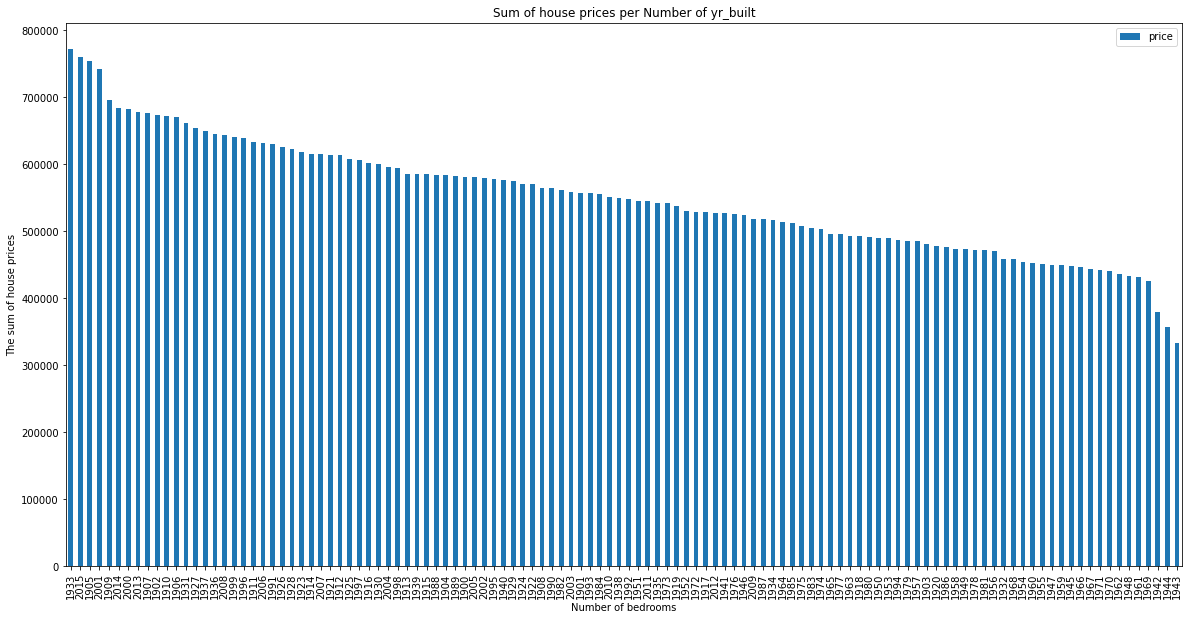

In [41]:
df[['yr_built','price']].groupby('yr_built').mean().sort_values(by='price',ascending= False).plot.bar(figsize = (20, 10))
plt.title('Sum of house prices per Number of yr_built')
plt.xlabel('Number of bedrooms')
plt.ylabel('The sum of house prices')
plt.show()

The year 1993 and 2015 has the highest number of average sales

Text(0.5, 1.0, 'Correlation between All Features')

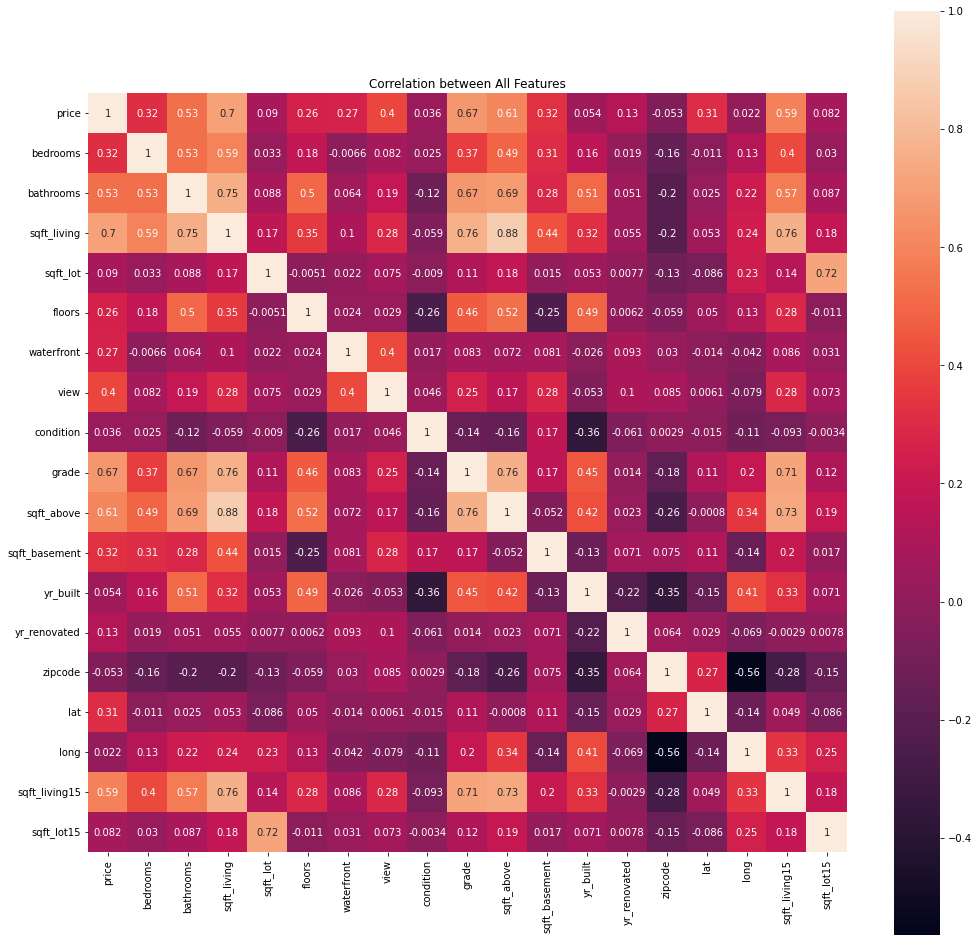

In [42]:
# Check correlation of all columns
plt.figure(figsize=(17,17))

sns.heatmap(df.corr(), square=True,annot=True)

plt.title('Correlation between All Features')

## **6.0 Linear Regression**

Assumptions

---

1. Assumptions of linearity
2. Assumption of normality of the error distribution
3. Assumption of homoscedasticity of errors
4. Assumption of independence of errors

In [43]:
# Dividing the data into attributes and labels as we did previously. 

# Removed latitude, longitude, yr_built and yr_renovated columns .. because they are not numerical
# Removed sqft_lot15, zipcode, yr_built, yr_renovated, condition, sqft_lot .. because they have no correlatopn with price

X =df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above',
'sqft_basement', 'sqft_living15']]
y = df['price']


In [44]:
# Let's display the VIF between the variables
correlations = X.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

bedrooms  bathrooms   sqft_living    floors      view  \
bedrooms        1.667626  -0.437337 -1.235545e+01  0.086956  0.142713   
bathrooms      -0.437337   2.931662  1.059160e+01 -0.837579  0.048548   
sqft_living   -12.415184  10.962255  2.126318e+15 -4.228946 -7.319957   
floors          0.086956  -0.837579 -4.246850e+00  1.828346 -0.019949   
view            0.142713   0.048548 -7.266370e+00 -0.019949  1.169961   
grade           0.356853  -0.482143  4.450710e+01 -0.410691 -0.113594   
sqft_above     10.292416 -10.960297 -1.917101e+15  3.488753  6.536664   
sqft_basement   5.461077  -6.181495 -1.024633e+15  2.688612  3.199288   
sqft_living15   0.022492   0.041866 -2.396523e+01  0.334629 -0.214585   

                   grade    sqft_above  sqft_basement  sqft_living15  
bedrooms        0.356853  1.003923e+01   5.420294e+00       0.022492  
bathrooms      -0.482143 -1.093887e+01  -5.990331e+00       0.041866  
sqft_living    43.668431 -1.917101e+15  -1.024633e+15     -22.926579  
floors         -0.410691  3.572863e+00   2.684966e+00       0.334629  
view           -0.113594  6.479981e+00   3.169349e+00      -0.214585  
grade           3.145834 -4.150809e+01  -2.194930e+01      -0.858159  
sqft_above    -40.757089  1.728470e+15   9.238153e+14      19.087311  
sqft_basement -21.516014  9.238153e+14   4.937515e+14      10.676157  
sqft_living15  -0.858159  2.002376e+01   1.117666e+01       2.779099

drop sqft_basement cz it is above 5

In [45]:
X = X.drop(['sqft_basement'], axis = 1)

In [46]:
# Let's display the VIF between the variables
correlations = X.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


bedrooms  bathrooms  sqft_living    floors      view     grade  \
bedrooms       1.667626  -0.437337    -1.082359  0.086956  0.142713  0.356853   
bathrooms     -0.437337   2.931662    -1.865582 -0.837579  0.048548 -0.482143   
sqft_living   -1.082359  -1.865582     8.137904  1.350461 -0.680795 -0.981597   
floors         0.086956  -0.837579     1.350461  1.828346 -0.019949 -0.410691   
view           0.142713   0.048548    -0.680795 -0.019949  1.169961 -0.113594   
grade          0.356853  -0.482143    -0.981597 -0.410691 -0.113594  3.145834   
sqft_above     0.074673   0.605357    -4.610968 -1.541674  0.550755 -0.500357   
sqft_living15  0.022492   0.041866    -0.771421  0.334629 -0.214585 -0.858159   

               sqft_above  sqft_living15  
bedrooms         0.074673       0.022492  
bathrooms        0.605357       0.041866  
sqft_living     -4.610968      -0.771421  
floors          -1.541674       0.334629  
view             0.550755      -0.214585  
grade           -0.500357      -0.858159  
sqft_above       6.334199      -0.887912  
sqft_living15   -0.887912       2.779099

sqft_living has VIF of 8.138

sqft_above has VIF of 6.334. Drop this column

In [47]:
X = X.drop(['sqft_above'], axis = 1)
X_features = X.copy()

In [48]:
# Let's display the VIF between the variables
correlations = X.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

bedrooms  bathrooms  sqft_living    floors      view     grade  \
bedrooms       1.666746  -0.444473    -1.028001  0.105130  0.136220  0.362751   
bathrooms     -0.444473   2.873808    -1.424913 -0.690242 -0.004088 -0.434324   
sqft_living   -1.028001  -1.424913     4.781359  0.228202 -0.279874 -1.345831   
floors         0.105130  -0.690242     0.228202  1.453119  0.114099 -0.532472   
view           0.136220  -0.004088    -0.279874  0.114099  1.122073 -0.070088   
grade          0.362751  -0.434324    -1.345831 -0.532472 -0.070088  3.106310   
sqft_living15  0.032959   0.126723    -1.417775  0.118521 -0.137381 -0.928297   

               sqft_living15  
bedrooms            0.032959  
bathrooms           0.126723  
sqft_living        -1.417775  
floors              0.118521  
view               -0.137381  
grade              -0.928297  
sqft_living15       2.654634

The VIF of our columns become above 5 which is acceptable.

In [49]:
# Dividing our data into training and test sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
# Training the Algorithm
# using the fit() method of the LinearRegression class

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [51]:
# the regression model has to find the most optimal coefficients for all the attributes.
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
bedrooms      -35893.446301
bathrooms     -15273.972263
sqft_living      207.431540
floors        -23056.861230
view           93299.711375
grade          97505.711374
sqft_living15     -8.701749

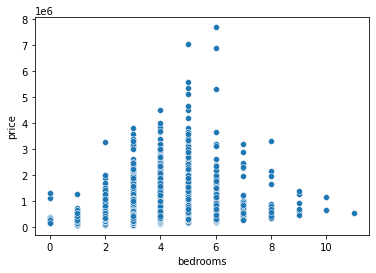

In [52]:
sns.scatterplot(x="bedrooms",
                    y="price",
                    data=df)

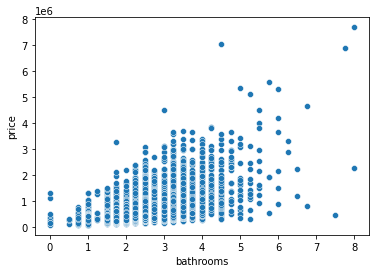

In [53]:
sns.scatterplot(x="bathrooms",
                    y="price",
                    data=df)

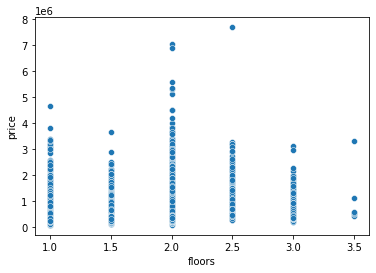

In [54]:
sns.scatterplot(x="floors",
                    y="price",
                    data=df)

In [55]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df_pred['Predicted'].round(7)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_pred

Actual   Predicted
9791   216500.000  216759.423
10281  451000.000  464162.776
19859 1100000.000 1002985.798
20059  650000.000  405309.593
21204 1060000.000  881930.832
...           ...         ...
17763  530000.000  704713.160
13212  370000.000  358308.133
8109   440000.000  453037.923
19727  334950.000  322877.532
16124 1930000.000  914815.186

[4322 rows x 2 columns]

In [56]:
df_pred.describe()

Actual   Predicted
count    4322.000    4322.000
mean   534668.346  539097.507
std    347822.480  278566.676
min     81000.000 -333313.172
25%    320000.000  350702.484
50%    450000.000  474519.616
75%    640750.000  664823.706
max   6890000.000 2819097.066

Our predictions seem to be close to the actual data, except for the min and max values

In [57]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))
# print('Variance score: {0:.2f}'.format(regressor.score(X, y)))

Mean Absolute Error: 155488.7809664783
Mean Squared Error: 53269196232.965195
Root Mean Squared Error: 230801.2050076108
R-Squared: 0.5595857679371383


In [58]:
# Test and Training Scores
score = regressor.score(X_train, y_train)
score2 = regressor.score(X_test, y_test)

print('Training set accuracy: ', '%.4f'%(score))
print('Test set accuracy: ', '%.4f'%(score2))

Training set accuracy:  0.5836
Test set accuracy:  0.5596


With or without the dropped columns, the accuracy remained the same which confirms that they had no impact on price of the house

**Regression without grade, floors and bathrooms**

*Removed them because they don't have a linear relationship with price*

In [59]:
X1 =df[['sqft_living', 'view', 'grade','sqft_living15']]
y1 = df['price']

# Dividing our data into training and test sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

# Training the Algorithm
# using the fit() method of the LinearRegression class

from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred1 = regressor1.predict(X_test1)

# To compare the actual output values for X_test with the predicted values
# 
df_pred1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
# df_pred['Predicted'].round(7)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_pred1

Actual  Predicted
9791   216500.000 208299.809
10281  451000.000 496269.245
19859 1100000.000 991406.410
20059  650000.000 450094.714
21204 1060000.000 892342.118
...           ...        ...
17763  530000.000 681664.854
13212  370000.000 349022.328
8109   440000.000 531377.231
19727  334950.000 315252.971
16124 1930000.000 898025.098

[4322 rows x 2 columns]

In [60]:
coeff_df1 = pd.DataFrame(regressor1.coef_, X1.columns, columns=['Coefficient'])
coeff_df1

Coefficient
sqft_living        170.650
view             99025.355
grade            94847.405
sqft_living15       -4.007

In [61]:
df_pred1.describe()

Actual   Predicted
count    4322.000    4322.000
mean   534668.346  539146.435
std    347822.480  277216.600
min     81000.000 -417471.354
25%    320000.000  350808.961
50%    450000.000  481788.764
75%    640750.000  673357.305
max   6890000.000 2743337.506

In [62]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
print('R-Squared:', metrics.r2_score(y_test1, y_pred1))
# print('Variance score: {0:.2f}'.format(regressor.score(X, y)))

Mean Absolute Error: 157166.75895682428
Mean Squared Error: 53962178800.49283
Root Mean Squared Error: 232297.60825392246
R-Squared: 0.5538563894802928


In [63]:
# Test and Training Scores
score = regressor1.score(X_train1, y_train1)
score2 = regressor1.score(X_test1, y_test1)

print('Training set accuracy: ', '%.4f'%(score))
print('Test set accuracy: ', '%.4f'%(score2))

Training set accuracy:  0.5766
Test set accuracy:  0.5539


The second regression has a higher RMSE of 232297.60825392246 than the first one which had 230801.2050076108. But they both had almost similar accuracy 0f 0.5544, the first one being 0.5596. 
Therefore the first model would be a better choice.

We can see that the value of root mean squared error is 43.18% of the mean price. Which is really high.

This means that our model is not very accurate. But it can make good-ish predictions.

**Residual plot**

In [64]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

4429.161040148034

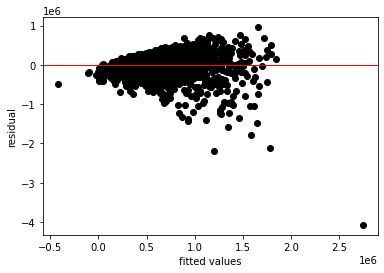

In [65]:
import matplotlib.pyplot as plt

plt.scatter(y_pred1, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Most of our residuals are randomnly scattered around 0, but it also tends to go out into a cone shape 

**Heteroscedacity Testing**

In [66]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred1, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred1)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


**Cross Validation**

In [67]:
from sklearn.model_selection import KFold
from sklearn import metrics

X =df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_living15']].values
y = df['price'].values

folds = KFold(n_splits=10)

#Printing the number of folds we will use
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 10 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1  # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))

# set up the train and test based on the split determined by KFold
# With 10 folds, we will end up with 90% of our data in the training set, and 10% in the test set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)

  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)

  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 249212.69721941702

Training model 2
Model 2 Root Mean Squared Error: 259740.08258196415

Training model 3
Model 3 Root Mean Squared Error: 229460.3993252439

Training model 4
Model 4 Root Mean Squared Error: 261457.97492324002

Training model 5
Model 5 Root Mean Squared Error: 224742.4702343486

Training model 6
Model 6 Root Mean Squared Error: 229561.7553322025

Training model 7
Model 7 Root Mean Squared Error: 227201.60852149606

Training model 8
Model 8 Root Mean Squared Error: 228604.18275506885

Training model 9
Model 9 Root Mean Squared Error: 236695.18117436537

Training model 10
Model 10 Root Mean Squared Error: 238612.52103266286


In [68]:
# Mean of RMSES
np.mean(RMSES)

238528.88731000098

From the assumptions listed above, we can see that our model satisfies the assumptions for multiple linear regression. Columns with VIF of above 5 were dropped thus our independent variables have no multicollinearity.

The variances of our errors are also homogenous, as seen in Bartlett's test above. The residual plot above, has also shown that that our residuals are randomnly distributed. However, our RMSE is quite high for this model.

How can performace be improved:
1. Address the ooutliers. Linear models get easily impacted by outliers.
2. Not all attributes show a linear relation to price. Converting these attributes to quadratic form may provide a better fit.

## **7.0 Quantile Regression**

In [94]:
# Dividing the data into attributes and labels as we did previously. 

X =df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_living15']]
y = df['price']

# Dividing our data into training and test sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
# predict price by 0.1, 0.5, 0.9
from lightgbm import LGBMRegressor
classifiers = {}
for tau in [ 0.1 , 0.5 , 0.9 ] :
  clf = LGBMRegressor ( objective = 'quantile' , alpha = tau )
  clf.fit(X_train , y_train )
  preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
  classifiers[str(tau)] = { 'clf' : clf , 'predictions' : preds }

In [97]:
# Create the dataframe to see the output
data = pd.DataFrame( { 
      '0.1' : classifiers [ '0.1' ] [ 'predictions' ] [ '0.1' ] ,
      '0.5' : classifiers [ '0.5' ] [ 'predictions' ] [ '0.5' ] ,
      '0.9' : classifiers [ '0.9' ] [ 'predictions' ] [ '0.9' ] ,
      'price' : y_test.reset_index () [ 'price' ] } )

In [98]:
data.head()

0.1        0.5         0.9       price
0 168350.033 262055.891  387213.170  216500.000
1 295196.751 370460.437  537294.675  451000.000
2 690885.690 840334.104 1077586.700 1100000.000
3 365151.798 497056.060  555393.388  650000.000
4 634401.918 788209.666 1157246.799 1060000.000

In [107]:
# #Performing a qauntile regression of the 25th,50th,75th percentile.
import statsmodels.formula.api as smf 

mod =smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + floors + view + grade +  sqft_living15',df)
res = mod.fit(0.25)
res1 = mod.fit(0.5)
res2 = mod.fit(0.75)
print('')
print('25% Percentile')
print(res.summary())
print('')
print('50% Percentile')
print(res1.summary())
print('')
print('75% Percentile')
print(res2.summary())


25% Percentile
                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2644
Model:                       QuantReg   Bandwidth:                   2.408e+04
Method:                 Least Squares   Sparsity:                    4.102e+05
Date:                Tue, 14 Jun 2022   No. Observations:                21607
Time:                        22:44:17   Df Residuals:                    21599
                                        Df Model:                            7
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -3.62e+05   9857.702    -36.720      0.000   -3.81e+05   -3.43e+05
bedrooms      -2.221e+04   1614.154    -13.760      0.000   -2.54e+04    -1.9e+04
bathrooms     -1.672e+04   2504.938     -6.676      0.000   -2.16e+04   -1.18e+04
sqft_living     100.3

## **8.0 Ridge Regression**

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X =df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above',
'sqft_basement','zipcode','sqft_living15', 'sqft_lot15']]
y = df['price']

# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

# The output  value of 0.355289 will be our indicator to determine if the regularized ridge regression model is superior or not.

52398889330.69604


In [74]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [75]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 


52784232472.19789

In [76]:
search.best_params_

{'alpha': 0.01}

* The best_params_ tells us what to set alpha too which in this case is 0.01. 
* The best_score_ tells us what the best possible mean squared error is. 
* In this case, the value of 52810957602.95012 is worse than what the baseline model was. 

In [77]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
second_model1 =(metrics.r2_score(y_true=y,y_pred=regression.predict(X)))
print("lasso score:", gridlasso.score(X_test, y_test))
print('mean_squared_error: ', second_model)
print('R Squared : ', second_model1)

mean_squared_error:  52404301582.09175
R Squared :  0.6118084071591465


The 52426012837.01283 is lower than the 52810957602.95012. This is because the last results are not cross-validated.

In addition, these results indicate that there is big difference between the ridge and baseline models. 

The R squared is 0.61, which is a bit higher than linear regression which was 0.59

In [78]:
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'bathrooms': -14929.93133537076,
 'bedrooms': -33121.10297902698,
 'floors': 91259.55292622835,
 'sqft_living': 200.84556818121564,
 'sqft_lot': -21698.105767645084,
 'view': 12.32833387179744,
 'waterfront': 88159.5097048762}

The mean squared error for ridge regression is 52426012837.01283 which is lower than the MSE of linear regression which is 53269196232.965195.

## **9.0 Lasso Regression**

In [112]:
# Before building the models, let's first scale data. 
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
# X =df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above',
# 'sqft_basement','zipcode','sqft_living15', 'sqft_lot15']]
X =df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_living15']]
y = df['price']

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [113]:
# We can basically build the Lasso model. 
# Importing linear models
# 
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
# lasso.fit(X, y) 
lasso.fit(X_train, y_train) 

print("lasso score:", lasso.score(X_train, y_train)) 
print("lasso MSE:", mean_squared_error(y_test, lasso.predict(X_test))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6087829785924102
lasso MSE: 51225438834.58624
lasso coef: [-36063.52837256  -6336.89622867 276642.91088287   4179.46055362
  -3861.87586033  52628.55617941  39036.53532009  36365.42818609
 117826.85294869 -93336.97598152 -38675.40970081  24204.10579289
  13597.76734747 -19765.65473568]


In [114]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch.  

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.5932119979662942
linear score: 0.5932053704506093
lasso MSE: 54879061477.71256
linear MSE: 54879955584.32067
lasso best estimator coef: [-34413.02632296  -9809.89358226 186108.87660334 -13360.56029723
  69506.75373239 113362.85866107  -4101.50697777]
linear coef: [-34456.0680976   -9899.14337521 186265.77522028 -13388.50933984
  69522.7778615  113441.2653415   -4228.35808128]


The mean squared error of the linear and lasso regression are almost similar

The lasso accuracy score is 0.59 which is higher than the linear score which was 0.55

## **10.0 Elastic Net Regression**

In [115]:
# Importing our libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [116]:
# Data preparation
# 
X =df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_living15']]
y = df['price']

# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
first_model1 =(metrics.r2_score(y_true=y,y_pred=regression.predict(X)))
print('Mean Squared Error :', first_model)
print('R Squared :', first_model1)

# This mean standard error score of 46635063424.38999 is our benchmark for determining 
# if the elastic net model will be better or worst.

Mean Squared Error : 56761754214.9143
R Squared : 0.5794865871666384


In [117]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': -12442.778758184826,
 'bedrooms': -35124.88187679678,
 'floors': -24865.060320520184,
 'grade': 95992.97842694116,
 'sqft_living': 201.28273180749784,
 'sqft_living15': -4.430513533289741,
 'view': 92270.22112876903}

In [118]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [119]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

57212497376.43909

In [120]:
print("elastic net best parameters:", search.best_params_)

elastic net best parameters: {'alpha': 1e-05, 'l1_ratio': 0.8}


In [121]:
# The best hyperparameters was an alpha set to 1e-05, and a l1_ratio of 0.8. 
# With these settings we got an MSE of 1.08. This is above our baseline model of MSE 47336571409.167564  for the 
# baseline model (46635063424.38999) 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
second_model1 =(metrics.r2_score(y_true=y,y_pred=elastic.predict(X)))
print('Mean Squared Error :', second_model)
print('R Squared :', second_model1)

Mean Squared Error : 56965521385.409164
R Squared : 0.5779769997785573


The mean squared error for elastic net 56965521385.409164 is worse than that of our linear regression 53269196232.965195

In [123]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 1558.8205795862477,
 'bedrooms': -27614.90882427638,
 'floors': -22215.145556474577,
 'grade': 92138.85282283468,
 'sqft_living': 173.0017850511411,
 'sqft_living15': 15.115498994083836,
 'view': 91137.93964961897}

**Conclusion**

Ridge regression has the lowest mean squared error and highest r2 of all the models. This would be our preferred model.